<a href="https://colab.research.google.com/github/mariacmartins/bioinformatica-disciplina/blob/main/Aula_4_Python_para_Bioinform%C3%A1tica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 4: Python para Bioinformática

## BioPython: 
Uma biblioteca para leitura, escrita, manipulação e visualização de dados biológicos disponível para a linguagem Python.

**Submódulos do Biopython**:
- Seq: Permite representar sequências biológicas (DNA, RNA ou proteínas) e disponibiliza uma série de métodos interessantes para a manipulação destas sequências.
- SeqIO: Permite que façamos a leitura e escrita de diferentes formatos de arquivo de sequência.
- SeqUtils: Permite fazer predições e analisar propriedades de moléculas.
- Align: Ferramenta para alinhamentos múltiplos.
- AlignIO: Ler os dados de alinhamento.
-Phylo: Utilizado para análises de filogenética e construção de árvores filogenéticas.

In [1]:
!pip install biopython

In [2]:
!apt install muscle

Reading package lists... Done
Building dependency tree       
Reading state information... Done
muscle is already the newest version (1:3.8.31+dfsg-3).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


### Dogma central:
Utilizando a classe Seq disponível no módulo Bio.Seq, crie uma variável chamada dna_sequence para representar a sequência de DNA "ATGTTTAAATGA" e a partir desta:
- Gere a sequência de DNA complementar (reverse complement)
- Gere a sequência de RNA
- Gere a sequência de proteína


In [3]:
from Bio.Seq import Seq 

In [4]:
dna_sequence = Seq("ATGTTTAAATGA")
dna_sequence

Seq('ATGTTTAAATGA')

In [5]:
# sequência de DNA complementar
dna_sequence.reverse_complement()

Seq('TCATTTAAACAT')

In [6]:
# sequência de RNA
dna_sequence.transcribe()

Seq('AUGUUUAAAUGA')

In [7]:
# sequência de proteína
dna_sequence.translate()

Seq('MFK*')

### 2D Electrophoresis:
Imagine que você está trabalhando em um projeto de análise proteômica de Mycobacterium tuberculosis através de eletroforese bidimensional, uma técnica analítica que separa proteínas a partir de seu ponto isoelétrico e massa molecular, resultando assim em diferentes spots. Neste projeto você identificou que um dos spots se apresenta “mais forte” (maior expressão) em uma cepa isolada de um hospital (resistente a antibióticos), e quase ausente na cepa controle (suscetível a antibióticos), e agora é necessário identificar qual proteína é esta. 
- Baixe o arquivo “mtb.fasta”  com o seguinte comando: 
!wget -O mtb.fasta http://bit.ly/bioinfo-biopython-mtb
- Leia as sequências do arquivo utilizando o módulo Bio.SeqIO
- Utilizando o módulo Bio.SeqUtils e a biblioteca Pandas, crie um DataFrame e armazene nele os dados de massa molecular e ponto isoelétrico, arredondando os valores numéricos para apenas 2 casas decimais
- Identifique a proteína que possui massa molecular igual a 57114.73 e ponto isoelétrico igual a 6.75. 


In [8]:
from Bio import SeqIO

from Bio.SeqUtils import ProtParam

import pandas as pd

In [9]:
!wget -O mtb.fasta http://bit.ly/bioinfo-biopython-mtb

--2021-04-05 14:15:30--  http://bit.ly/bioinfo-biopython-mtb
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.uniprot.org/uniprot/?query=proteome:UP000001584&format=fasta [following]
--2021-04-05 14:15:30--  https://www.uniprot.org/uniprot/?query=proteome:UP000001584&format=fasta
Resolving www.uniprot.org (www.uniprot.org)... 193.62.193.81, 128.175.245.202
Connecting to www.uniprot.org (www.uniprot.org)|193.62.193.81|:443... connected.
HTTP request sent, awaiting response... 200 
Length: unspecified [text/plain]
Saving to: ‘mtb.fasta’

mtb.fasta               [            <=>     ]   1.85M   369KB/s    in 5.1s    

2021-04-05 14:15:35 (369 KB/s) - ‘mtb.fasta’ saved [1936612]



In [10]:
#criando o dataframe
df = pd.DataFrame(columns=['protein_id', 'molecular_weight', 'isoeletric_point'])

handle = open('mtb.fasta')
parser = SeqIO.parse(handle, 'fasta')

for record in parser:
  protein_analyzer = ProtParam.ProteinAnalysis(str(record.seq))
  df = df.append(
      {
      'protein_id': record.id, 
      'molecular_weight': round(protein_analyzer.molecular_weight(), 2),
      'isoeletric_point': round(protein_analyzer.isoelectric_point(), 2)
      },
      ignore_index=True
    )

In [11]:
# inspecionando o df
df.head()

,protein_id,molecular_weight,isoeletric_point
0,sp|O05581|PAT_MYCTU,35625.40,5.14
1,sp|P9WI11|PPE28_MYCTU,67066.57,4.47
2,sp|P9WHN7|PTH_MYCTU,20455.27,9.63
3,sp|P9WHA9|RL28B_MYCTU,9095.34,12.00
4,sp|P9WHE3|RL7_MYCTU,13440.31,4.59


In [12]:
#encontrando a proteína desejada a partir do peso molecular e do ponto isoelétrico
df.query('molecular_weight == 57114.73 and isoeletric_point == 6.75')

,protein_id,molecular_weight,isoeletric_point
74,sp|P9WG91|STP_MYCTU,57114.73,6.75


### MUSCLE: 
Imagine agora que você identificou o gene responsável pelo spot diferencialmente expresso entre as duas cepas e que gostaria de fazer uma análise filogenética com base nele. Para isso, você usará as sequências disponíveis no UniProt que apresentam pelo menos 90% de similaridade com a proteína identificada no spot. Entretanto, antes é necessário realizar um alinhamento múltiplo, e por isso você resolve usar a ferramenta MUSCLE. 

- Baixe o arquivo “mtb-90.fasta”  com o seguinte comando: 
!wget -O mtb-90.fasta http://bit.ly/biopython-mtb-90-stp 
- Utilizando a classe MuscleCommandline do módulo Bio.Align.Applications, produza um alinhamento múltiplo no formato FASTA e com o nome “mtb-90.aligned.fasta” a partir do arquivo “mtb-90.fasta”.



In [13]:
from Bio.Align.Applications import MuscleCommandline

In [14]:
!wget -O mtb-90.fasta http://bit.ly/biopython-mtb-90-stp 

--2021-04-05 14:15:48--  http://bit.ly/biopython-mtb-90-stp
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.uniprot.org/uniprot/?query=P9WG90+OR+A5U522+OR+R4MFT3+OR+A0A045INE6+OR+A0A655I569+OR+A0A0H3LBD1+OR+A0A655CEJ5+OR+A0A655G224+OR+A0A1R3Y0V9+OR+A0A109SY95+OR+A0A501P535+OR+A0A0H3M715+OR+A0A328GGU5+OR+A0A0K2HXW9+OR+G0TNP1&sort=score&format=fasta [following]
--2021-04-05 14:15:48--  https://www.uniprot.org/uniprot/?query=P9WG90+OR+A5U522+OR+R4MFT3+OR+A0A045INE6+OR+A0A655I569+OR+A0A0H3LBD1+OR+A0A655CEJ5+OR+A0A655G224+OR+A0A1R3Y0V9+OR+A0A109SY95+OR+A0A501P535+OR+A0A0H3M715+OR+A0A328GGU5+OR+A0A0K2HXW9+OR+G0TNP1&sort=score&format=fasta
Resolving www.uniprot.org (www.uniprot.org)... 193.62.193.81, 128.175.245.202
Connecting to www.uniprot.org (www.uniprot.org)|193.62.193.81|:443... connected.
HTTP request sent, awaiting response... 200 

In [15]:
muscle_command = MuscleCommandline(input="mtb-90.fasta", out="mtb-90.aligned.fasta", fasta=True)
stdout, stderr = muscle_command()
print(stderr)


MUSCLE v3.8.31 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

mtb-90 15 seqs, max length 537, avg  length 530
00:00:00    44 MB(10%)  Iter   1    0.83%  K-mer dist pass 1
00:00:00    44 MB(10%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00    44 MB(10%)  Iter   1    0.83%  K-mer dist pass 2
00:00:00    44 MB(10%)  Iter   1  100.00%  K-mer dist pass 2
00:00:00    44 MB(10%)  Iter   1    7.14%  Align node       
00:00:00    47 MB(11%)  Iter   1   14.29%  Align node
00:00:00    48 MB(11%)  Iter   1   21.43%  Align node
00:00:00    48 MB(11%)  Iter   1   28.57%  Align node
00:00:00    48 MB(11%)  Iter   1   35.71%  Align node
00:00:00    49 MB(11%)  Iter   1   42.86%  Align node
00:00:00    49 MB(11%)  Iter   1   50.00%  Align node
00:00:00    49 MB(11%)  Iter   1   57.14%  Align node
00:00:00    50 MB(11%)  Iter   1   64.29%  Align node
00:00:00    50 MB(11%)  Iter   1   71.43%  

### Árvore filogenética:

- Leia o arquivo “mtb-90.aligned.fasta” utilizando o módulo Bio.AlignIO e carregue o primeiro alinhamento para uma variável alignment;
- Produza uma matriz de distância a partir do alinhamento usando como base a matriz BLOSUM62;
- Produza uma árvore filogenética com o algoritmo Neighbor Join (NJ) a partir da matriz de distância;
- Plote a árvore filogenética produzida com NJ.
- Salve a árvore com o nome “nj.newick”.
- Produza uma árvore filogenética com o algoritmo UPGMA a partir da matriz de distância;
- Plote a árvore filogenética produzida com UPGMA.
- Salve a árvore com o nome “upgma.newick”.


In [16]:
from Bio import AlignIO

In [17]:
# carregando o alinhamento na variável alignment 
handle = open('mtb-90.aligned.fasta')
parser = AlignIO.parse(handle, 'fasta')

alignment = next(parser)

In [18]:
print(alignment.format('clustal'))

CLUSTAL X (1.81) multiple sequence alignment


tr|A0A109SY95|A0A109SY95_MYCTX      MNRTQLLTLIATGLGLFMIFLDALIVNVALPDIQRSFAVGEDGLQWVVAS
tr|A0A1R3Y0V9|A0A1R3Y0V9_MYCBO      MNRTQLLTLIATGLGLFMIFLDALIVNVALPDIQRSFAVGEDGLQWVVAS
tr|A0A0H3M715|A0A0H3M715_MYCBP      MNRTQLLTLIATGLGLFMIFLDALIVNVALPDIQRSFAVGEDGLQWVVAS
tr|A0A0K2HXW9|A0A0K2HXW9_MYCBI      MNRTQLLTLIATGLGLFMIFLDALIVNVALPDIQRSFAVGEDGLQWVVAS
tr|G0TNP1|G0TNP1_MYCCP              MNRTQLLTLIATGLGLFMIFLDALIVNVALPDIQRSFAVGEDGLQWVVAS
tr|A0A328GGU5|A0A328GGU5_MYCTX      MNRTQLLTLIATGLGLFMIFLDALIVNVALPDIQRSFAVGEDGLQWVVAS
tr|A0A501P535|A0A501P535_9MYCO      MNRTQLLTLIATGLGLFMIFLDALIVNVALPDIQRSFAVGEDGLQWVVAS
tr|A0A655CEJ5|A0A655CEJ5_MYCTX      MNRTQLLTLIATGLGLFMIFLDALIVNVALPDIQRSFAVGEDGLQWVVAS
tr|A0A655G224|A0A655G224_MYCTX      MNRTQLLTLIATGLGLFMIFLDALIVNVALPDIQRSFAVGEDGLQWVVAS
tr|A0A655I569|A0A655I569_MYCTX      MNRTQLLTLIATGLGLFMIFLDALIVNVALPDIQRSFAVGEDGLQWVVAS
tr|A5U522|A5U522_MYCTA              MNRTQLLTLIATGLGLFMIFLDALIVNVALPDIQRSFAVGEDGLQWV

/usr/local/lib/python3.7/dist-packages/Bio/Align/__init__.py:308: BiopythonDeprecationWarning: alignment.format has been deprecated, and we intend to remove it in a future release of Biopython. Instead of alignment.format(format_spec), please use format(alignment, format_spec) or an f-string.
  BiopythonDeprecationWarning,


In [19]:
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor

import matplotlib.pyplot as plt

In [20]:
calculator = DistanceCalculator(model="blosum62")

distance_matrix = calculator.get_distance(alignment)

In [21]:
distance_matrix

DistanceMatrix(names=['tr|A0A109SY95|A0A109SY95_MYCTX', 'tr|A0A1R3Y0V9|A0A1R3Y0V9_MYCBO', 'tr|A0A0H3M715|A0A0H3M715_MYCBP', 'tr|A0A0K2HXW9|A0A0K2HXW9_MYCBI', 'tr|G0TNP1|G0TNP1_MYCCP', 'tr|A0A328GGU5|A0A328GGU5_MYCTX', 'tr|A0A501P535|A0A501P535_9MYCO', 'tr|A0A655CEJ5|A0A655CEJ5_MYCTX', 'tr|A0A655G224|A0A655G224_MYCTX', 'tr|A0A655I569|A0A655I569_MYCTX', 'tr|A5U522|A5U522_MYCTA', 'sp|P9WG90|STP_MYCTO', 'tr|A0A045INE6|A0A045INE6_MYCTX', 'tr|A0A0H3LBD1|A0A0H3LBD1_MYCTE', 'tr|R4MFT3|R4MFT3_MYCTX'], matrix=[[0], [0.0053252187143401075, 0], [0.0053252187143401075, 0.0, 0], [0.0053252187143401075, 0.0, 0.0, 0], [0.0022822365918599985, 0.003042982122479998, 0.003042982122479998, 0.003042982122479998, 0], [0.0022822365918599985, 0.003042982122479998, 0.003042982122479998, 0.003042982122479998, 0.0, 0], [0.0022822365918599985, 0.003042982122479998, 0.003042982122479998, 0.003042982122479998, 0.0, 0.0, 0], [0.04027355623100304, 0.04103343465045595, 0.04103343465045595, 0.04103343465045595, 0.037993

In [22]:
# Produzindo uma árvore filogenética com o algoritmo Neighbor Join (NJ) 
constructor = DistanceTreeConstructor()

tree = constructor.nj(distance_matrix)

In [23]:
Phylo.draw_ascii(tree)

 , tr|A0A0H3LBD1|A0A0H3LBD1_MYCTE
 |
 , tr|A0A045INE6|A0A045INE6_MYCTX
 |
 , sp|P9WG90|STP_MYCTO
 |
 |                                       , tr|A0A501P535|A0A501P535_9MYCO
 |                                       |
 |                                       , tr|A0A328GGU5|A0A328GGU5_MYCTX
 |                                       |
 |                                       | tr|G0TNP1|G0TNP1_MYCCP
 |                                       |
 |_______________________________________|__ tr|A0A109SY95|A0A109SY95_MYCTX
 |                                       |
 |                                       |    , tr|A0A0K2HXW9|A0A0K2HXW9_MYCBI
_|                                       |____|
 |                                            , tr|A0A0H3M715|A0A0H3M715_MYCBP
 |                                            |
 |                                            | tr|A0A1R3Y0V9|A0A1R3Y0V9_MYCBO
 |
 |   , tr|A5U522|A5U522_MYCTA
 |   |
 |___| tr|A0A655I569|A0A655I569_MYCTX
 |   |
 |   |____ tr|A0A655

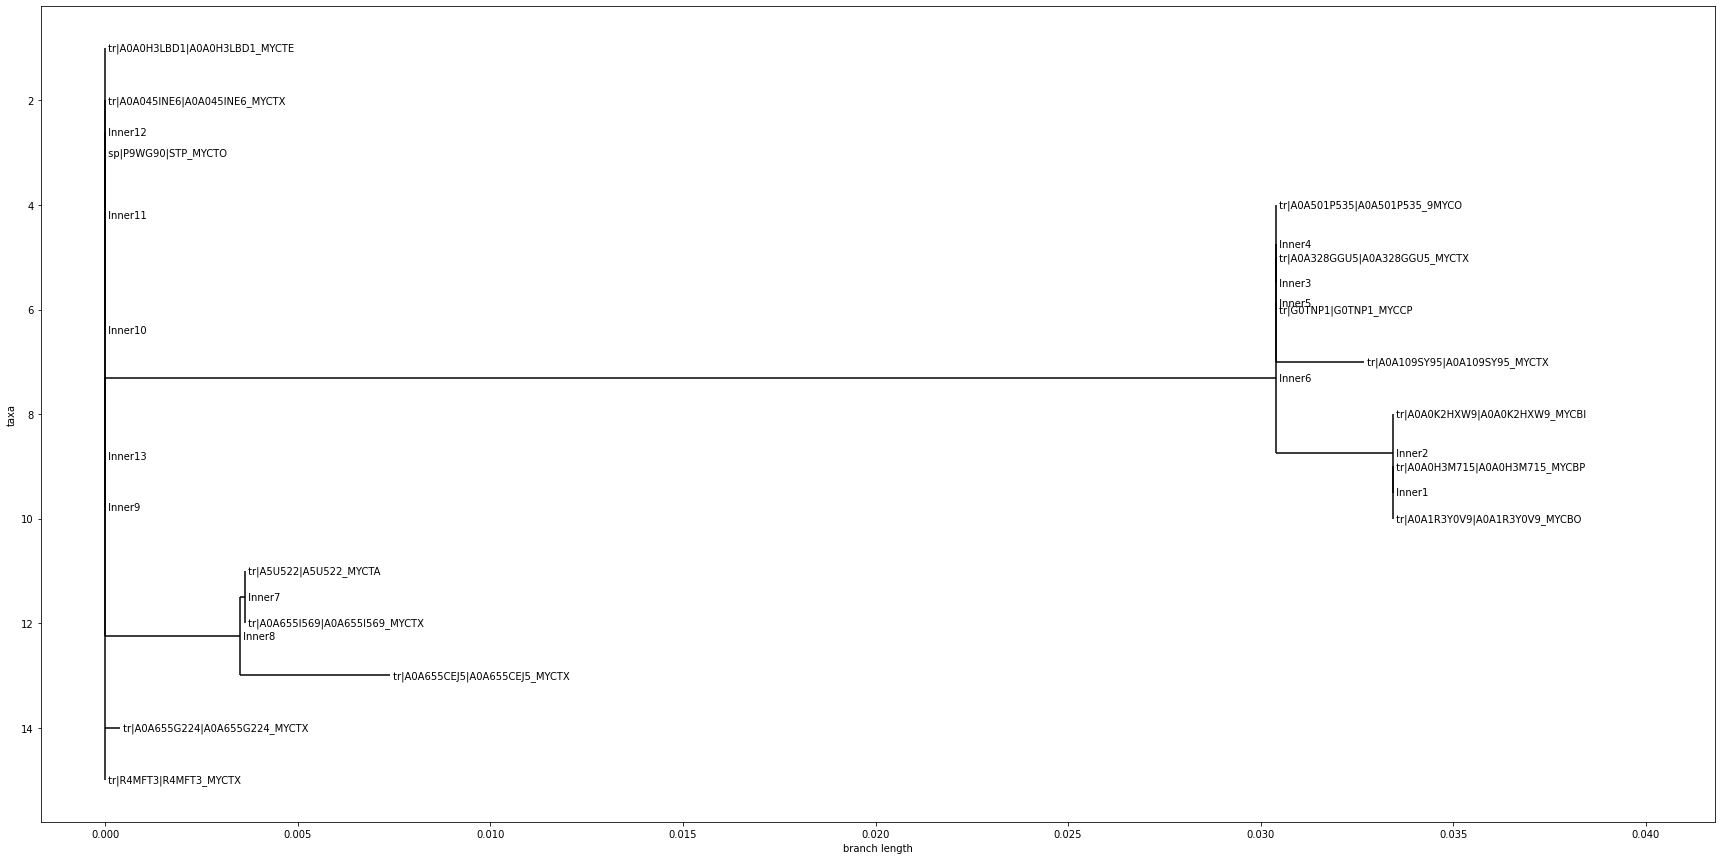

In [24]:
fig = plt.figure(figsize=(30,15))
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(tree, axes=axes)

In [25]:
# Salvando a árvore construída com NJ com o nome “nj.newick”.
Phylo.write([tree], open('nj.newick', 'w'), 'newick')

1

In [26]:
# Produzindo uma árvore filogenética com o algoritmo UPGMA 
constructor = DistanceTreeConstructor()

upgmatree = constructor.upgma(distance_matrix)

In [27]:
Phylo.draw_ascii(upgmatree)

                                              , tr|A5U522|A5U522_MYCTA
                                          ____|
                                         |    | tr|A0A655I569|A0A655I569_MYCTX
                                         |
                                         |    , tr|R4MFT3|R4MFT3_MYCTX
                                    _____|    |
                                   |     |    | tr|A0A0H3LBD1|A0A0H3LBD1_MYCTE
                                   |     |    |
                                   |     |   ,| tr|A0A045INE6|A0A045INE6_MYCTX
  _________________________________|     |   ||
 |                                 |     |___|| sp|P9WG90|STP_MYCTO
 |                                 |         |
 |                                 |         | tr|A0A655G224|A0A655G224_MYCTX
 |                                 |
 |                                 |______ tr|A0A655CEJ5|A0A655CEJ5_MYCTX
_|
 |                                          , tr|A0A0K2HXW9|A0A0K2HXW9_MYCBI
 |

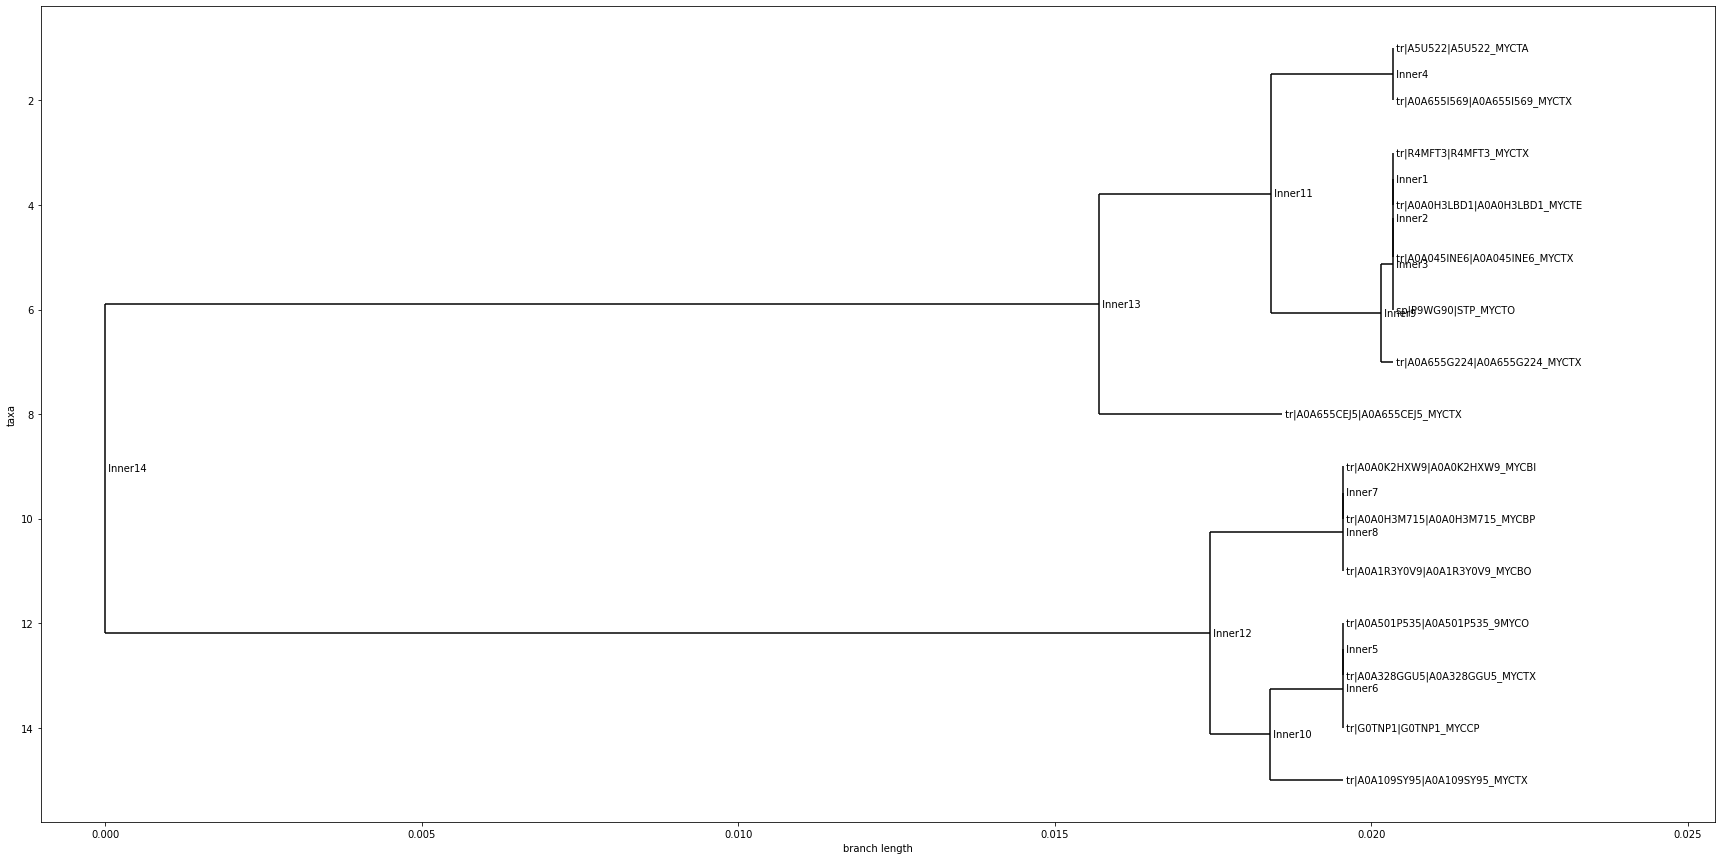

In [28]:
fig = plt.figure(figsize=(30,15))
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(upgmatree, axes=axes)

In [29]:
# Salvando a árvore construída com UPGMA com o nome “upgma.newick”
Phylo.write([upgmatree], open('upgma.newick', 'w'), 'newick')

1